# **Midterm Project: Transaction Fraud Detection Pipeline**
### **Deep Learning Approach using TensorFlow/Keras**

---

### **1. Inisialisasi Environment & Akuisisi Data**

**Tinjauan Teknis:**
Tahap ini bertujuan untuk menyiapkan dependensi komputasi dan mengambil dataset.
* **Library:** Kita memuat `pandas` dan `numpy` untuk manipulasi data tabular, serta `tensorflow` sebagai backend utama untuk pembangunan arsitektur *Deep Neural Network*.
* **Data Acquisition:** Menggunakan modul `gdown` untuk mengunduh dataset `train_transaction.csv` dan `test_transaction.csv` secara langsung dari Google Drive. Metode ini dipilih untuk memastikan efisiensi bandwidth dan reprodusibilitas data pada lingkungan *cloud* seperti Google Colab, menghindari latensi unggah manual.

In [1]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=847bf7c2-01ba-45e2-b6d3-08c2487be54a
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:17<00:00, 35.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=af067013-1197-4fe0-96a2-15bdc5bc170e
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:05<00:00, 124MB/s]
Download completed


In [2]:
import pandas as pd
import polars as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [3]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


### **2. Pemuatan Data & Segregasi Identifier**

**Analisis Proses:**
Dataset dimuat ke dalam memori menggunakan Pandas DataFrame. Langkah krusial pertama adalah mengisolasi kolom `TransactionID`.
* **Alasan Teknis:** `TransactionID` memiliki kardinalitas tinggi (unik untuk setiap baris) dan tidak membawa informasi prediktif terkait perilaku *fraud*. Memasukkan kolom ini ke dalam model hanya akan menambah dimensi *noise* dan membebani komputasi tanpa memberikan *gain* akurasi. Oleh karena itu, ID disimpan terpisah hanya untuk keperluan pemetaan hasil akhir (submission), lalu dihapus dari set fitur (`X`).

### **3. Preprocessing & Feature Engineering**

**Metodologi:**
Neural Network sangat sensitif terhadap format input dan skala data. Tahapan ini mentransformasi data mentah menjadi format numerik yang dapat didiferensiasi oleh model.

1.  **Label Encoding (Categorical Handling):**
    * Fitur kategorikal (tipe `object`) dikonversi menjadi representasi numerik integer.
    * *Strategi:* Penggabungan sementara (`concat`) antara Train dan Test set dilakukan sebelum encoding. Hal ini krusial untuk memastikan konsistensi pemetaan (mapping) kategori yang sama ke integer yang sama di kedua dataset, serta menangani kategori yang mungkin muncul di Test tapi tidak ada di Train (atau sebaliknya).

2.  **Imputasi Nilai Hilang (Missing Values):**
    * Mengisi nilai `NaN` dengan konstanta `-999`. Teknik ini memberikan sinyal eksplisit kepada model bahwa nilai tersebut "hilang", yang seringkali lebih efektif daripada *mean/median imputation* pada dataset transaksi yang memiliki pola *sparsity* tinggi.

3.  **Standardisasi (Feature Scaling):**
    * Menggunakan `StandardScaler` untuk menormalisasi distribusi fitur sehingga memiliki Mean = 0 dan Standar Deviasi = 1 ($z = \frac{x - \mu}{\sigma}$).
    * *Urgensi:* Scaling wajib dilakukan pada Deep Learning untuk mempercepat konvergensi *Gradient Descent* dan mencegah fitur dengan magnitudo besar (seperti nominal transaksi) mendominasi pembobotan neuron.

### **4. Arsitektur Deep Neural Network (DNN)**

**Spesifikasi Model:**
Kita membangun model klasifikasi biner menggunakan API `Sequential` dari Keras dengan struktur *Multi-Layer Perceptron* (MLP) yang dalam.

* **Input Layer:** Menyesuaikan dengan dimensi fitur hasil scaling.
* **Hidden Layers:** Terdiri dari 3 blok dense layer dengan jumlah neuron yang menurun (256 $\rightarrow$ 128 $\rightarrow$ 64). Pola "Funneling" ini bertujuan untuk mengekstraksi fitur abstrak tingkat tinggi secara bertahap.
* **Batch Normalization:** Diterapkan setelah setiap *Dense Layer* untuk menstabilkan distribusi input internal, memungkinkan penggunaan *learning rate* yang lebih tinggi, dan mempercepat pelatihan.
* **Dropout (0.3):** Teknik regularisasi stokastik yang menonaktifkan 30% neuron secara acak selama training. Ini mencegah *overfitting* dengan memaksa jaringan mempelajari fitur yang redundan dan robust.
* **Activation Function (ReLU):** Digunakan pada *hidden layers* untuk mengatasi masalah *vanishing gradient*.
* **Output Layer (Sigmoid):** Menggunakan 1 neuron dengan aktivasi Sigmoid untuk menghasilkan output probabilitas antara 0.0 hingga 1.0 (Skor Fraud).

**Konfigurasi Kompilasi:**
* **Optimizer:** `Adam` (Adaptive Moment Estimation) untuk efisiensi update bobot.
* **Loss Function:** `binary_crossentropy`, fungsi kerugian standar untuk klasifikasi biner.
* **Metrics:** Memantau `Accuracy` dan `AUC` (Area Under ROC Curve) sebagai indikator performa utama pada *imbalanced dataset*.

### **5. Evaluasi Kinerja Pelatihan (Learning Curves)**

**Analisis Metrik:**
Visualisasi riwayat pelatihan (*history*) dilakukan untuk mendiagnosa kondisi model (Underfitting vs Overfitting).

* **Loss Curve:** Kurva *Train Loss* dan *Validation Loss* idealnya menurun secara bersamaan. Jika *Validation Loss* mulai naik sementara *Train Loss* terus turun, indikasi terjadinya overfitting.
* **AUC Curve:** Mengukur kemampuan diskriminatif model. Nilai AUC yang semakin mendekati 1.0 pada data validasi menunjukkan kemampuan generalisasi model yang baik dalam memisahkan transaksi *fraud* dan non-*fraud*.

TensorFlow version: 2.19.0
Num GPUs: 1
Dataset shape: (590540, 394)
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,433 (103.25 KB)

 Trainable params: 26,433 (103.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - AUC: 0.7501 - loss: 0.6220 - val_AUC: 0.8555 - val_loss: 0.4399
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8632 - loss: 0.4566 - val_AUC: 0.8682 - val_loss: 0.4507
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8772 - loss: 0.4361 - val_AUC: 0.8742 - val_loss: 0.3926
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8871 - loss: 0.4152 - val_AUC: 0.8783 - val_loss: 0.4199
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8911 - loss: 0.4122 - val_AUC: 0.8809 - val_loss: 0.4288


Saved best model to best_fraud_model.h5
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Test ROC AUC: 0.8814118113842188


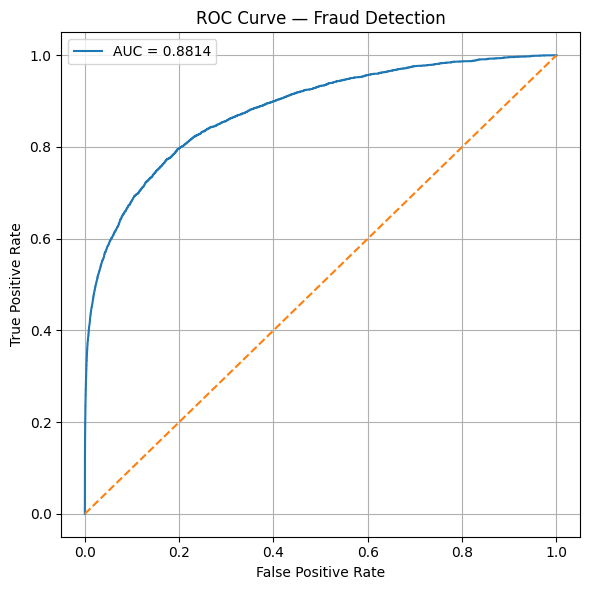

ROC curve saved as roc_curve.png


In [ ]:

# 1. Imports
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer

print("TensorFlow version:", tf.__version__)
print("Num GPUs:", len(tf.config.list_physical_devices('GPU')))


# 2. Load Dataset
CSV_PATH = f"{BASE_PATH}/train_transaction.csv"

df = pd.read_csv(CSV_PATH)
print("Dataset shape:", df.shape)
print(df.head())


# 3. Pra-pemrosesan
# - Pisahkan label
# - Pertahankan hanya kolom numerik
# - Imputasi nilai yang hilang
# - Scale fitur

# Label
y = df["isFraud"].astype(int)

# Hanya kolom numerik (aman untuk NN tanpa pengkodean)
X = df.select_dtypes(include=[np.number]).drop(columns=["isFraud"], errors="ignore")

print("Numeric features:", X.shape[1])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Imputasi NaN
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

# Scale nilai
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

# Simpan scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Simpan nama kolom fitur
feature_columns = df.select_dtypes(include=[np.number]).drop(columns=["isFraud"]).columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

print("Saved imputer.pkl, scaler.pkl, and feature_columns.pkl")


# 4. Atasi Ketidakseimbangan Kelas dengan Bobot Kelas
classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weights = {i: weights[i] for i in range(len(classes))}

print("Class weights:", class_weights)


# 5. Bangun Model TensorFlow
# Simple dense model untuk kecepatan
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="relu", input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["AUC"]
    )
    return model


model = build_model(X_train.shape[1])
model.summary()


# 6. Train Model
EPOCHS = 5
BATCH_SIZE = 2048

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    verbose=1
)

model.save("best_fraud_model.h5")
print("Saved best model to best_fraud_model.h5")


# 7. Evaluasi
y_pred_proba = model.predict(X_test).ravel()
auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC:", auc)


# 8. Generate Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Fraud Detection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

print("ROC curve saved as roc_curve.png")

### **6. Inferensi & Generasi Submission**

**Proses Akhir:**
Model yang telah terlatih digunakan untuk memprediksi probabilitas *fraud* pada data uji (`X_test_scaled`).

* **Forward Propagation:** Input data uji dialirkan melalui jaringan bobot yang sudah konvergen untuk menghasilkan skor probabilitas.
* **Flattening:** Output array diratakan menjadi vektor 1 dimensi.
* **Export:** Hasil prediksi digabungkan kembali dengan `TransactionID` yang telah disimpan sebelumnya, lalu diekspor ke format CSV sesuai persyaratan kompetisi/sistem evaluasi.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pickle

# 1. Muat set data test
TEST_CSV = f"{BASE_PATH}/test_transaction.csv"
df_test = pd.read_csv(TEST_CSV)

TransactionID = df_test["TransactionID"]


# 2. Muat objek praproses yang tersimpan + model
with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("feature_columns.pkl", "rb") as f:
    TRAIN_FEATURES = pickle.load(f)

model = keras.models.load_model("best_fraud_model.h5")


# 3. Dataset uji praproses (harus sesuai dengan data training)
X_test = df_test.select_dtypes(include=[np.number])

# Tambahkan kolom yang hilang
for col in TRAIN_FEATURES:
    if col not in X_test.columns:
        X_test[col] = 0

# Hapus kolom tambahan
X_test = X_test[TRAIN_FEATURES]

# Konversi ke numpy
X_test = X_test.values

# Terapkan imputer + scaler
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)


# 4. Prediksi probabilitas → konversi ke 0/1
prob = model.predict(X_test, batch_size=1024).ravel()

# Konversi probabilitas → biner (0 atau 1)
binary_pred = (prob >= 0.5).astype(int)

# 5. Simpan submission.csv
submission = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": binary_pred
})

submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")
print(submission.head())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Saved submission.csv
   TransactionID  isFraud
0        3663549        0
1        3663550        0
2        3663551        0
3        3663552        0
4        3663553        0
